<a href="https://colab.research.google.com/github/Feliperm2000/ANN_Mestrado/blob/main/Aula_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.datasets import make_moons

In [3]:
class Perceptron:
    def __init__(self, input_size, learning_rate, epochs):
        self.weights = np.zeros(input_size)
        self.bias = 0
        self.learning_rate = learning_rate
        self.epochs = epochs

    def _activation_function(self, x):
        return np.where(x >= 0, 1, 0)

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self._activation_function(linear_output)

    def fit(self, X, y):
        for _ in range(self.epochs):
            for i in range(X.shape[0]):
                y_pred = self.predict(X[i])
                if y_pred != y[i]:
                    self.weights += self.learning_rate * (y[i] - y_pred) * X[i]
                    self.bias += self.learning_rate * (y[i] - y_pred)

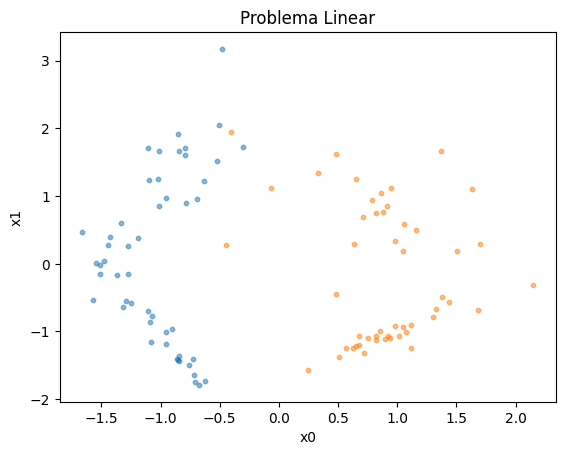

In [49]:
X, y = make_classification(
    n_samples=100, n_features=2, n_classes=2,
    n_informative=2, n_redundant=0, n_repeated=0,
    random_state=1
)

plt.scatter(X[y==0,0], X[y==0,1], s=10, alpha=0.5)
plt.scatter(X[y==1,0], X[y==1,1], s=10, alpha=0.5)
plt.title('Problema Linear')
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

In [ ]:
model = Perceptron(input_size=X.shape[1], learning_rate=0.001, epochs=5000)
model.fit(X, y)
y_pred = model.predict(X)

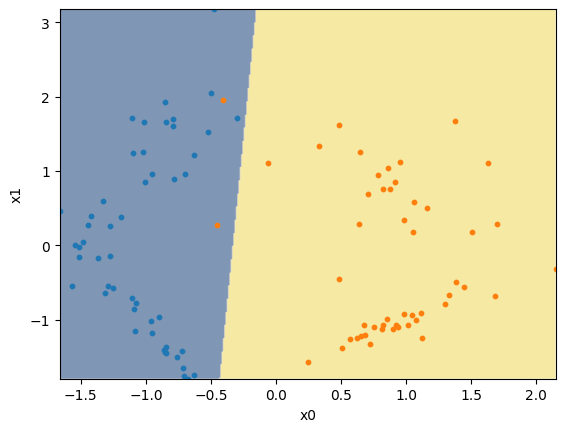

In [ ]:
def plot_decision_boundary(model, X, y, axis=None):
    xx, yy = np.meshgrid(np.arange(X[:,0].min(), X[:,0].max(), 0.01),
                         np.arange(X[:,1].min(), X[:,1].max(), 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    if axis is None:
        plt.contourf(xx, yy, Z, alpha=0.5, cmap='cividis', antialiased=True)
        plt.scatter(X[y==0,0], X[y==0,1], s=10)
        plt.scatter(X[y==1,0], X[y==1,1], s=10)
        plt.xlim(X[:,0].min(), X[:,0].max())
        plt.ylim(X[:,1].min(), X[:,1].max())
        plt.xlabel('x0')
        plt.ylabel('x1')
    else:
        axis.contourf(xx, yy, Z, alpha=0.5, cmap='cividis', antialiased=True)
        axis.scatter(X[y==0,0], X[y==0,1], s=10)
        axis.scatter(X[y==1,0], X[y==1,1], s=10)
        axis.set_xlim(X[:,0].min(), X[:,0].max())
        axis.set_ylim(X[:,1].min(), X[:,1].max())
        axis.set_xlabel('x0')
        axis.set_ylabel('x1')

plot_decision_boundary(model, X, y)
plt.show()

In [26]:
class MultilayerPerceptron:
    def __init__(self, input_size, hidden_size, learning_rate=0.01, epochs=1000):
        self.weights_input_hidden = np.random.randn(input_size, hidden_size)
        self.bias_hidden = np.zeros(hidden_size)
        self.weights_hidden_output = np.random.randn(hidden_size, 1)
        self.bias_output = np.zeros(1)
        self.learning_rate = learning_rate
        self.epochs = epochs

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def _sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward(self, X):
        self.hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = self._sigmoid(self.hidden_input)
        self.final_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.final_output = self._sigmoid(self.final_input)
        return self.final_output

    def backward(self, X, y):
        # Calcula o erro e o gradiente na camada de saída
        output_error = y - self.final_output
        output_delta = output_error * self._sigmoid_derivative(self.final_output)
        # Calcula o erro e o gradiente na camada oculta
        hidden_error = output_delta.dot(self.weights_hidden_output.T)
        hidden_delta = hidden_error * self._sigmoid_derivative(self.hidden_output)
        # Ajusta os pesos e viés por meio de gradient descent
        self.weights_hidden_output += self.hidden_output.T.dot(output_delta) * self.learning_rate
        self.bias_output += np.sum(output_delta, axis=0) * self.learning_rate
        self.weights_input_hidden += X.T.dot(hidden_delta) * self.learning_rate
        self.bias_hidden += np.sum(hidden_delta, axis=0) * self.learning_rate

    def fit(self, X, y):
        for _ in range(self.epochs):
            self.forward(X)
            self.backward(X, y)

    def predict(self, X):
        return self.forward(X)

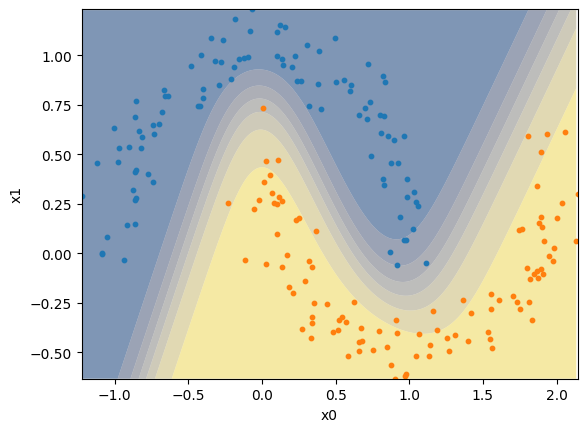

In [36]:
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)
y = np.expand_dims(y, axis=1)

model = MultilayerPerceptron(input_size=X.shape[1], hidden_size=3, epochs=10_000)
model.fit(X, y)
y_pred = model.predict(X)

plot_decision_boundary(model, X, y[:,0])
plt.show()

## 👌 Entrega Exercícios

In [69]:
X, y = make_classification(
    n_samples=100, n_features=2, n_classes=2,
    n_informative=2, n_redundant=0, n_repeated=0,
    random_state=5
)


In [70]:
model = Perceptron(input_size=X.shape[1], learning_rate=0.01, epochs=10000)
model.fit(X, y)
y_pred = model.predict(X)

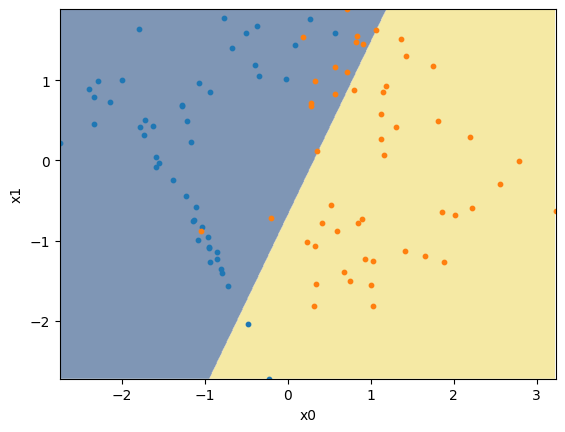

In [71]:
def plot_decision_boundary(model, X, y, axis=None):
    xx, yy = np.meshgrid(np.arange(X[:,0].min(), X[:,0].max(), 0.01),
                         np.arange(X[:,1].min(), X[:,1].max(), 0.01))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    if axis is None:
        plt.contourf(xx, yy, Z, alpha=0.5, cmap='cividis', antialiased=True)
        plt.scatter(X[y==0,0], X[y==0,1], s=10)
        plt.scatter(X[y==1,0], X[y==1,1], s=10)
        plt.xlim(X[:,0].min(), X[:,0].max())
        plt.ylim(X[:,1].min(), X[:,1].max())
        plt.xlabel('x0')
        plt.ylabel('x1')
    else:
        axis.contourf(xx, yy, Z, alpha=0.5, cmap='cividis', antialiased=True)
        axis.scatter(X[y==0,0], X[y==0,1], s=10)
        axis.scatter(X[y==1,0], X[y==1,1], s=10)
        axis.set_xlim(X[:,0].min(), X[:,0].max())
        axis.set_ylim(X[:,1].min(), X[:,1].max())
        axis.set_xlabel('x0')
        axis.set_ylabel('x1')

plot_decision_boundary(model, X, y)
plt.show()

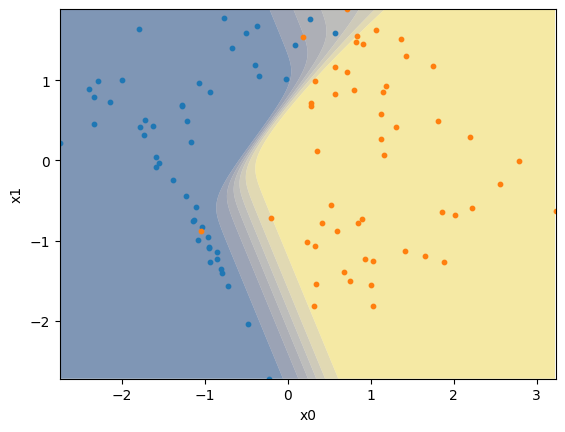

In [75]:
# transformar em vetor coluna
y_t = y[:, np.newaxis]

model = MultilayerPerceptron(input_size=X.shape[1], hidden_size=2, epochs=100000)
model.fit(X, y_t)
y_pred = model.predict(X)

plot_decision_boundary(model, X, y_t[:,0])
plt.show()

Fiz com outro random state para dar um pouco mais de emoção :)

Ao rodar várias vezes, o resultado se permanece o mesmo, tendo em vista que esse método é não estocástico e, começando do mesmo ponto e com os mesmos inputs, o resultado deve ser sempre o mesmo.

Teste extra :) : Este problema não é possível de ser satisfatoriamente resolvido usando apenas um percepton, mesmo com várias épocas e pequenos passos para os ganhos. Porém, quando inseridoa possibilidade de não linearidades com múltiplos neurônios, foi possível resolver satisfatoriamente o problema (conforme segundo plot).

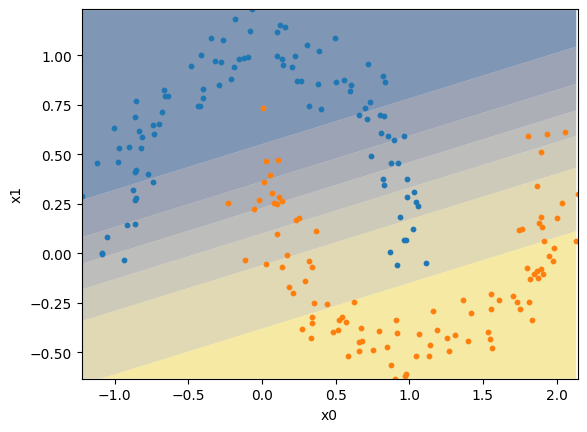

In [76]:
# Apenas um Perceptron na camada oculta

X, y = make_moons(n_samples=200, noise=0.1, random_state=42)
y = np.expand_dims(y, axis=1)

model = MultilayerPerceptron(input_size=X.shape[1], hidden_size=1, epochs=10_000)
model.fit(X, y)
y_pred = model.predict(X)

plot_decision_boundary(model, X, y[:,0])
plt.show()

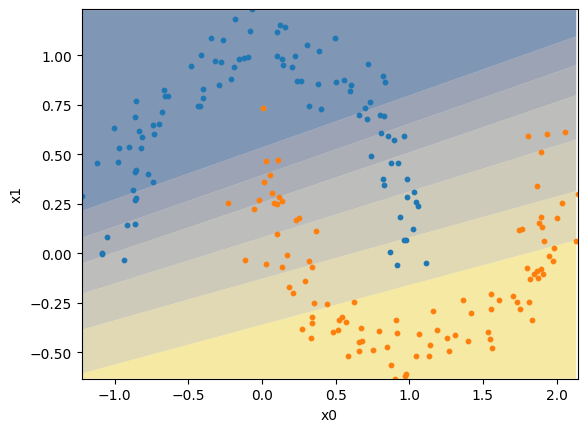

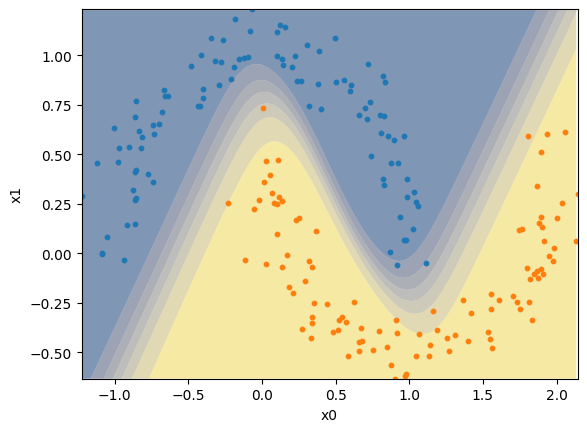

In [112]:
# Apenas dois Perceptrons

X, y = make_moons(n_samples=200, noise=0.1, random_state=42)
y = np.expand_dims(y, axis=1)

model = MultilayerPerceptron(input_size=X.shape[1], hidden_size=2, epochs=10000)
model.fit(X, y)
y_pred = model.predict(X)

plot_decision_boundary(model, X, y[:,0])
plt.show()

model = MultilayerPerceptron(input_size=X.shape[1], hidden_size=10, epochs=10000)
model.fit(X, y)
y_pred = model.predict(X)

plot_decision_boundary(model, X, y[:,0])
plt.show()

Mesmo com dois Perceptrons não foi possível resolver o problema. A função ideal para a separação dos pontos seria algo próximo a uma senoide. Essa, necessita de pelo menos 3 funções lineares para se aproximar dela, devido a sua não linearidade.

In [107]:
import torch
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.metrics import classification_report
from torch.utils.data import DataLoader, TensorDataset

In [105]:
class MLP(torch.nn.Module):
    def __init__(self, input_size, hidden_size):
        super(MLP, self).__init__()
        self.hidden_layer = torch.nn.Linear(input_size, hidden_size)
        self.output_layer = torch.nn.Linear(hidden_size, 1)

    def forward(self, x):
        x = torch.nn.functional.sigmoid(self.hidden_layer(x))
        return torch.nn.functional.sigmoid(self.output_layer(x))

In [101]:
model = MLP(2, 3)

In [119]:
X, y = make_moons(n_samples=200, noise=0.1, random_state=45)
y = np.expand_dims(y, axis=1)

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).unsqueeze(1)

dataset = TensorDataset(X, y)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

num_epochs = 2000
loss_logs = []

criterion = torch.nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)

for epoch in range(num_epochs):

    # Start epoch loss
    running_loss = 0.0

    for b, (X_batch, y_batch) in enumerate(dataloader):

        # Forward pass
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch.squeeze(2)) # Remove the extra dimension

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Update running loss
        running_loss += loss.item()

    # Update epoch loss
    loss_logs.append(running_loss/b)

# Plot loss
plt.plot(loss_logs)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

with torch.no_grad():
    outputs = model(X)

plot_decision_boundary(outputs, X, y[:,0])

AttributeError: 'MultilayerPerceptron' object has no attribute 'parameters'

TypeError: Input z must be at least a (2, 2) shaped array, but has shape (200, 1)

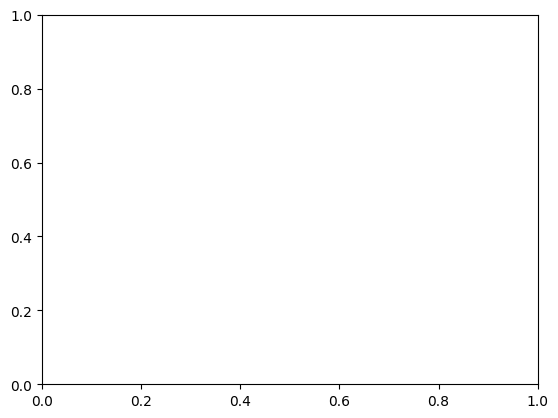

In [118]:
xx, yy = np.meshgrid(np.arange(X[:,0].min(), X[:,0].max(), 0.01),
                      np.arange(X[:,1].min(), X[:,1].max(), 0.01))

Z = outputs

plt.contourf(xx, yy, Z, alpha=0.5, cmap='cividis', antialiased=True)
plt.scatter(X[y==0,0], X[y==0,1], s=10)
plt.scatter(X[y==1,0], X[y==1,1], s=10)
plt.xlim(X[:,0].min(), X[:,0].max())
plt.ylim(X[:,1].min(), X[:,1].max())
plt.xlabel('x0')
plt.ylabel('x1')

plot_decision_boundary(model, X, y)
plt.show()